In [1]:
import os
import random
import numpy as np
import pandas as pd

In [2]:
ahmet = pd.read_csv("input/oof_ahmet_v0.csv")
toda = pd.read_csv("input/oof_toda_v0.csv")
kuto = pd.read_csv("input/oof_kuto_v0.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(ahmet.loc[:, "s0":"s23"].mean().index,ahmet.loc[:, "s0":"s23"].mean().values)

<BarContainer object of 24 artists>

<BarContainer object of 24 artists>

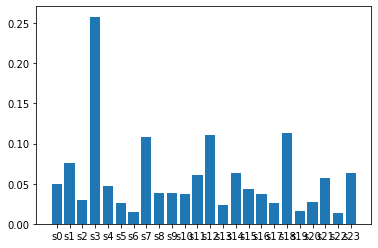

In [4]:
plt.bar(toda.loc[:, "s0":"s23"].mean().index,toda.loc[:, "s0":"s23"].mean().values)

<BarContainer object of 24 artists>

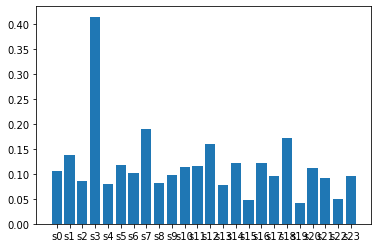

In [5]:
plt.bar(kuto.loc[:, "s0":"s23"].mean().index,kuto.loc[:, "s0":"s23"].mean().values)

In [6]:
all = pd.concat([ahmet, toda, kuto])
all = all.groupby(["recording_id", "patch"]).mean().reset_index(drop=False)
all

,recording_id,patch,s0,s1,s2,s3,s4,s5,s6,s7,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,00204008d,0,0.013466,0.007057,0.045235,0.190107,0.012047,0.068301,0.017072,0.036379,...,0.018753,0.010925,0.009205,0.020040,0.468090,0.010665,0.007863,0.025610,0.018612,0.051569
1,00204008d,1,0.007399,0.003517,0.071489,0.215500,0.007926,0.048266,0.047235,0.030789,...,0.027256,0.007513,0.006013,0.009988,0.404466,0.008807,0.006941,0.021605,0.011438,0.031362
2,00204008d,2,0.006395,0.005486,0.063053,0.139212,0.003044,0.074527,0.056806,0.109580,...,0.043980,0.012463,0.011662,0.030752,0.315282,0.004798,0.067558,0.003332,0.009471,0.009647
3,00204008d,3,0.012728,0.005274,0.061060,0.229326,0.002775,0.037517,0.014146,0.071010,...,0.008317,0.008599,0.016261,0.012230,0.398534,0.003886,0.006871,0.007525,0.014385,0.030662
4,00204008d,4,0.015677,0.003562,0.039174,0.460112,0.002501,0.055907,0.031520,0.020612,...,0.006738,0.007739,0.007929,0.008673,0.422929,0.048353,0.005080,0.006232,0.012768,0.019865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,fffb79246,3,0.003985,0.003420,0.031424,0.073269,0.006484,0.104251,0.034786,0.014654,...,0.004964,0.007602,0.011746,0.032962,0.005825,0.043744,0.073027,0.005883,0.050209,0.172170
37812,fffb79246,4,0.005627,0.003810,0.027722,0.139800,0.006168,0.092803,0.038428,0.017240,...,0.007513,0.005891,0.009190,0.027578,0.006492,0.027124,0.060378,0.006988,0.007965,0.140050
37813,fffb79246,5,0.007793,0.003148,0.083099,0.107965,0.007785,0.068366,0.021933,0.016774,...,0.007470,0.005151,0.058667,0.042437,0.024195,0.050568,0.050535,0.009724,0.007738,0.091355
37814,fffb79246,6,0.037219,0.008031,0.044361,0.079852,0.015111,0.083974,0.034628,0.035493,...,0.031475,0.010307,0.014356,0.039669,0.025719,0.028287,0.044443,0.026700,0.014906,0.071381


<BarContainer object of 24 artists>

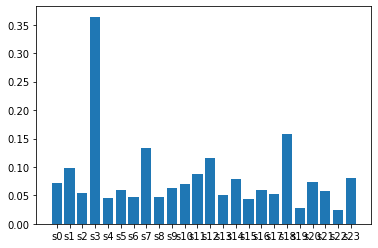

In [7]:
plt.bar(all.loc[:, "s0":"s23"].mean().index,all.loc[:, "s0":"s23"].mean().values)

In [8]:
def label(x):
    if x < 0.01:
        return -2
    elif x < 0.5:
        return 0
    return 1

In [9]:
all_pseudo = all.copy()
all_pseudo.loc[:, "s0":"s23"] = all.loc[:, "s0":"s23"].applymap(label)
all_pseudo

,recording_id,patch,s0,s1,s2,s3,s4,s5,s6,s7,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,00204008d,0,0,-2,0,0,0,0,0,0,...,0,0,-2,0,0,0,-2,0,0,0
1,00204008d,1,-2,-2,0,0,-2,0,0,0,...,0,-2,-2,-2,0,-2,-2,0,0,0
2,00204008d,2,-2,-2,0,0,-2,0,0,0,...,0,0,0,0,0,-2,0,-2,-2,-2
3,00204008d,3,0,-2,0,0,-2,0,0,0,...,-2,-2,0,0,0,-2,-2,-2,0,0
4,00204008d,4,0,-2,0,0,-2,0,0,0,...,-2,-2,-2,-2,0,0,-2,-2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,fffb79246,3,-2,-2,0,0,-2,0,0,0,...,-2,-2,0,0,-2,0,0,-2,0,0
37812,fffb79246,4,-2,-2,0,0,-2,0,0,0,...,-2,-2,-2,0,-2,0,0,-2,-2,0
37813,fffb79246,5,-2,-2,0,0,-2,0,0,0,...,-2,-2,0,0,0,0,0,-2,-2,0
37814,fffb79246,6,0,-2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
np.unique(all_pseudo.loc[:, "s0":"s23"].values, return_counts=True)

(array([-2,  0,  1]), array([308242, 554135,  45207]))

In [11]:
tp = pd.read_csv("./input/rfcx-species-audio-detection/train_tp.csv")
fp = pd.read_csv("./input/rfcx-species-audio-detection/train_fp.csv")

In [12]:
tp

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70
...,...,...,...,...,...,...,...
1211,fe8d9ac40,13,1,53.4720,93.750,54.0960,843.75
1212,fea6b438a,4,1,43.5787,2531.250,45.7653,4031.25
1213,ff2eb9ce5,0,1,15.2267,5906.250,16.0213,8250.00
1214,ffb8d8391,5,1,14.3467,4781.250,16.6987,10406.20


In [13]:
def extract_patch(t_min, t_max):
    if 0 <= t_min < 8:
        start_patch = 0
    elif 7 <= t_min < 15:
        start_patch = 1
    elif 14 <= t_min < 23:
        start_patch = 2
    elif 22 <= t_min < 30:
        start_patch = 3
    elif 29 <= t_min < 37:
        start_patch = 4
    elif 37 <= t_min < 45:
        start_patch = 5
    elif 44 <= t_min < 52:
        start_patch = 6
    elif 51 <= t_min < 60:
        start_patch = 7
    else:
        print(t_min)
        raise NotImplementedError


    if 51 < t_max <= 60:
        end_patch = 7
    elif 44 < t_max <= 52:
        end_patch = 6
    elif 37 < t_max <= 45:
        end_patch = 5
    elif 29 < t_max <= 37:
        end_patch = 4
    elif 22 < t_max <= 30:
        end_patch = 3
    elif 14 < t_max <= 23:
        end_patch = 2
    elif 7 < t_max <= 15:
        end_patch = 1
    elif 0 < t_max <= 8:
        end_patch = 0
    else:
        print(t_max)
        raise NotImplementedError

    patch = [i for i in range(start_patch, end_patch+1)]
    return patch

In [14]:
 # tp labelを追加
 for recording_id, df in tp.groupby("recording_id"):    
    for _, row in df.iterrows():
        labels = np.zeros((8,24))
        patch = extract_patch(row["t_min"], row["t_max"])
        labels[patch] = np.eye(24)[row["species_id"]].tolist() # tp labels
        pseudo = all_pseudo.loc[all_pseudo["recording_id"]==recording_id, "s0":"s23"].values
        updated_pseudo = np.where(labels == 1, 1, pseudo)  # tp labelが1のところのみ１に更新し,それ以外はpseudoをつかう
        all_pseudo.loc[all_pseudo["recording_id"]==recording_id, "s0":"s23"] = updated_pseudo

In [15]:
np.unique(all_pseudo.loc[:, "s0":"s23"].values, return_counts=True)

(array([-2,  0,  1]), array([308242, 554030,  45312]))

fp labelが1の箇所が0だったら-1に上書き

In [24]:
 # fp labelを追加
 for recording_id, df in fp.groupby("recording_id"):    
    for _, row in df.iterrows():
        labels = np.zeros((8,24))
        patch = extract_patch(row["t_min"], row["t_max"])
        labels[patch] = np.eye(24)[row["species_id"]].tolist() # fp labels
        pseudo = all_pseudo.loc[all_pseudo["recording_id"]==recording_id, "s0":"s23"].values
        updated_pseudo = np.where((labels==1) & (pseudo!=1), -1, pseudo)
        # updated_pseudo = np.where(labels == 1, -1, pseudo)  # fp labelが1のところのみ-１に更新し,それ以外はpseudoをつかう
        all_pseudo.loc[all_pseudo["recording_id"]==recording_id, "s0":"s23"] = updated_pseudo

In [25]:
np.unique(all_pseudo.loc[:, "s0":"s23"].values, return_counts=True)

(array([-2, -1,  0,  1]), array([303312,  10847, 548113,  45312]))

In [26]:
all_pseudo

,recording_id,patch,s0,s1,s2,s3,s4,s5,s6,s7,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,00204008d,0,0,-2,0,0,0,0,0,0,...,0,0,-2,0,0,0,-2,0,0,0
1,00204008d,1,-2,-2,0,0,-2,0,0,0,...,0,-2,-2,-2,0,-2,-2,-1,0,0
2,00204008d,2,-2,-2,0,0,-1,0,0,0,...,0,0,0,0,0,-2,0,-1,-2,-2
3,00204008d,3,0,-2,0,0,-2,0,0,0,...,-2,-2,0,0,0,-2,-2,-2,0,0
4,00204008d,4,0,-2,0,0,-2,0,0,0,...,-2,-2,-2,-2,0,0,-2,-2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,fffb79246,3,-2,-2,0,0,-2,0,0,0,...,-2,-2,0,0,-2,0,0,-2,0,0
37812,fffb79246,4,-2,-2,0,0,-2,0,0,0,...,-2,-2,-2,0,-2,0,0,-2,-2,0
37813,fffb79246,5,-2,-2,0,0,-2,0,0,0,...,-2,-2,0,0,0,0,0,-2,-2,0
37814,fffb79246,6,0,-2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
all_pseudo.to_csv("./input/rfcx-species-audio-detection/train_labels_v2.csv", index=False)